In [0]:
print("Hello World")
import pyspark.sql.functions as F

Hello World

In [0]:
aws_bucket_name = "learning-resources-datasets"
mount_name = "learning-resources"
encoded_secret_key = SECRET_KEY.replace("/", "%2F")

dbutils.fs.mount(f"s3a://{ACCESS_KEY}:{encoded_secret_key}@{aws_bucket_name}/kaggle-competitions/house-prices/", f"/mnt/{mount_name}/house-prices")
display(dbutils.fs.ls(f"/mnt/{mount_name}"))


In [0]:
df = spark.read.option("header", True).csv(f"/mnt/{mount_name}/house-prices/train.csv")
df = df.withColumn("SalePrice", df.SalePrice.cast("integer"))
df.printSchema()

root
-- Id: string (nullable = true)
-- MSSubClass: string (nullable = true)
-- MSZoning: string (nullable = true)
-- LotFrontage: string (nullable = true)
-- LotArea: string (nullable = true)
-- Street: string (nullable = true)
-- Alley: string (nullable = true)
-- LotShape: string (nullable = true)
-- LandContour: string (nullable = true)
-- Utilities: string (nullable = true)
-- LotConfig: string (nullable = true)
-- LandSlope: string (nullable = true)
-- Neighborhood: string (nullable = true)
-- Condition1: string (nullable = true)
-- Condition2: string (nullable = true)
-- BldgType: string (nullable = true)
-- HouseStyle: string (nullable = true)
-- OverallQual: string (nullable = true)
-- OverallCond: string (nullable = true)
-- YearBuilt: string (nullable = true)
-- YearRemodAdd: string (nullable = true)
-- RoofStyle: string (nullable = true)
-- RoofMatl: string (nullable = true)
-- Exterior1st: string (nullable = true)
-- Exterior2nd: string (nullable = true)
-- MasVnrType: string (nullable = true)
-- MasVnrArea: string (nullable = true)
-- ExterQual: string (nullable = true)
-- ExterCond: string (nullable = true)
-- Foundation: string (nullable = true)
-- BsmtQual: string (nullable = true)
-- BsmtCond: string (nullable = true)
-- BsmtExposure: string (nullable = true)
-- BsmtFinType1: string (nullable = true)
-- BsmtFinSF1: string (nullable = true)
-- BsmtFinType2: string (nullable = true)
-- BsmtFinSF2: string (nullable = true)
-- BsmtUnfSF: string (nullable = true)
-- TotalBsmtSF: string (nullable = true)
-- Heating: string (nullable = true)
-- HeatingQC: string (nullable = true)
-- CentralAir: string (nullable = true)
-- Electrical: string (nullable = true)
-- 1stFlrSF: string (nullable = true)
-- 2ndFlrSF: string (nullable = true)
-- LowQualFinSF: string (nullable = true)
-- GrLivArea: string (nullable = true)
-- BsmtFullBath: string (nullable = true)
-- BsmtHalfBath: string (nullable = true)
-- FullBath: string (nullable = true)
-- HalfBath: string (nullable = true)
-- BedroomAbvGr: string (nullable = true)
-- KitchenAbvGr: string (nullable = true)
-- KitchenQual: string (nullable = true)
-- TotRmsAbvGrd: string (nullable = true)
-- Functional: string (nullable = true)
-- Fireplaces: string (nullable = true)
-- FireplaceQu: string (nullable = true)
-- GarageType: string (nullable = true)
-- GarageYrBlt: string (nullable = true)
-- GarageFinish: string (nullable = true)
-- GarageCars: string (nullable = true)
-- GarageArea: string (nullable = true)
-- GarageQual: string (nullable = true)
-- GarageCond: string (nullable = true)
-- PavedDrive: string (nullable = true)
-- WoodDeckSF: string (nullable = true)
-- OpenPorchSF: string (nullable = true)
-- EnclosedPorch: string (nullable = true)
-- 3SsnPorch: string (nullable = true)
-- ScreenPorch: string (nullable = true)
-- PoolArea: string (nullable = true)
-- PoolQC: string (nullable = true)
-- Fence: string (nullable = true)
-- MiscFeature: string (nullable = true)
-- MiscVal: string (nullable = true)
-- MoSold: string (nullable = true)
-- YrSold: string (nullable = true)
-- SaleType: string (nullable = true)
-- SaleCondition: string (nullable = true)
-- SalePrice: string (nullable = true)

## Cleaning Columns for features

In [0]:

from datetime import datetime

def clean_int_columns(df):
    int_columns = ["LotFrontage", "LotArea", "OverallQual", "YearBuilt", "TotRmsAbvGrd", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea"]
    # convert interger columns to integers
    for feature in int_columns:
        df = df.withColumn(feature, df[feature].cast("integer"))

    bool_columns = ["CentralAir" ]
    for feature in bool_columns:
        df = df.withColumn(feature, F.when(df[feature] == "Y", 1).otherwise(0))

    year = datetime.today().year
    df = df.withColumn("YearsOld", df.YearBuilt - F.lit(year))
    return df

## Checking correlation between possible numerical features

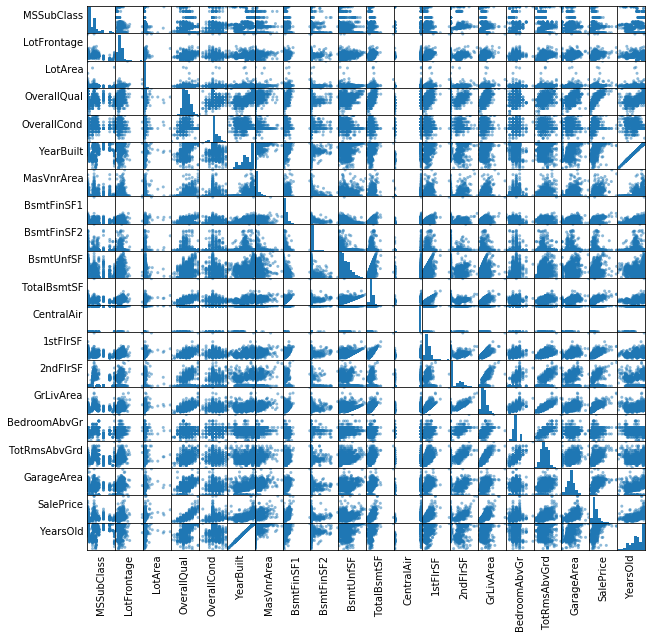

In [0]:
import pandas as pd
numeric_features = [t[0] for t in clean_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = clean_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [0]:
import six
for i in clean_df.columns:
    if not( isinstance(clean_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to SalePrice for ", i, clean_df.stat.corr('SalePrice',i))


Correlation to SalePrice for MSSubClass -0.08428413512659509
Correlation to SalePrice for LotFrontage 0.2096239447994837
Correlation to SalePrice for LotArea 0.2638433538714051
Correlation to SalePrice for OverallQual 0.7909816005838053
Correlation to SalePrice for OverallCond -0.07785589404867796
Correlation to SalePrice for YearBuilt 0.522897332879497
Correlation to SalePrice for MasVnrArea 0.4726144990045735
Correlation to SalePrice for BsmtFinSF1 0.38641980624215344
Correlation to SalePrice for BsmtFinSF2 -0.011378121450215155
Correlation to SalePrice for BsmtUnfSF 0.21447910554696925
Correlation to SalePrice for TotalBsmtSF 0.6135805515591942
Correlation to SalePrice for CentralAir 0.25132816384015527
Correlation to SalePrice for 1stFlrSF 0.6058521846919153
Correlation to SalePrice for 2ndFlrSF 0.3193338028320674
Correlation to SalePrice for GrLivArea 0.7086244776126517
Correlation to SalePrice for BedroomAbvGr 0.1682131543007397
Correlation to SalePrice for TotRmsAbvGrd 0.5337231555820284
Correlation to SalePrice for GarageArea 0.6234314389183622
Correlation to SalePrice for SalePrice 1.0
Correlation to SalePrice for YearsOld 0.5228973328794975

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-3056911043999352> in <module> 
 4 print ( "Correlation to SalePrice for " , i , clean_df . stat . corr ( 'SalePrice' , i ) ) 
 5 
 ----> 6 print ( "Correlation to 1stFlrSF for TotalBsmtSF " , clean_df . state . corr ( "1stFlrSF" , "TotalBsmtSF" ) ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in __getattr__ (self, name) 
 1417 if name not in self . columns : 
 1418 raise AttributeError(
 -> 1419 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
 1420 jc = self . _jdf . apply ( name ) 
 1421 return Column ( jc ) 

 AttributeError : 'DataFrame' object has no attribute 'state'

In [0]:
print("Correlation to 1stFlrSF for TotalBsmtSF ", clean_df.stat.corr("1stFlrSF", "TotalBsmtSF"))
print("Correlation to TotalBsmtSF for 2ndFlrSF ", clean_df.stat.corr("TotalBsmtSF", "2ndFlrSF"))
print("Correlation to TotalBsmtSF for GrLivArea ", clean_df.stat.corr("TotalBsmtSF", "GrLivArea"))

Correlation to 1stFlrSF for TotalBsmtSF 0.8195299750050338
Correlation to TotalBsmtSF for 2ndFlrSF -0.17451195013496046
Correlation to TotalBsmtSF for GrLivArea 0.45486820254790317

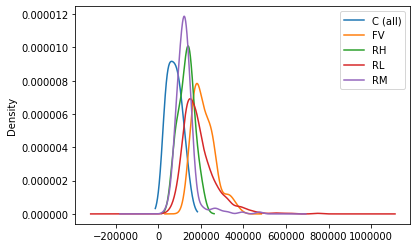

In [0]:
categorical_columns = ["MSZoning", "Street", "LotShape", "LandContour", "LotConfig", "Condition1", "BldgType", "HouseStyle", "RoofStyle", "Exterior1st", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtExposure", "BsmtFinType1", "HeatingQC", "GarageType", "GarageFinish", "Fence"]
# for column in categorical_columns:
#     clean_df.groupBy(column).agg(F.avg("SalePrice"), F.count("*"), F.min("SalePrice"), F.max("SalePrice"), F.variance("SalePrice"), F.skewness("SalePrice"), F.stddev("SalePrice")).orderBy("avg(SalePrice)").show()

clean_df.toPandas().groupby("MSZoning")["SalePrice"].plot(kind="density", legend=True)


In [0]:
df.select("GarageType").distinct().show(truncate=False)
options = [row.GarageType for row in df.select("GarageType").distinct().collect()]
options.sort()
print(options)

+----------+
GarageType|
+----------+
NA |
Detchd |
Attchd |
CarPort |
BuiltIn |
Basment |
2Types |
+----------+

['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']

In [0]:
import re

def clean_categorical_columns(df):
    categorical_features = {
        "ExterQual": ["Ex", "Gd", "TA", "Fa", "Po"],
        "BsmtQual": ["Ex", "Gd", "TA", "Fa", "Po", "NA"],
        "BldgType": ["Twnhs", "1Fam", "Duplex", "2fmCon", "TwnhsE", "TwnhsI"],
        "HouseStyle": ["1.5Fin", "SLvl", "1Story", "1.5Unf", "2Story", "2.5Fin", "2.5Unf", "SFoyer"],
        "Neighborhood": ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
        "ExterCond": ['Ex', 'Fa', 'Gd', 'Po', 'TA'],
        "BsmtFinType1": ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf'],
        "GarageType": ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']
    }
    categorical_coded_features = []
    for feature, categories in categorical_features.items():
        for category in categories:
            new_col_name = feature + "_" + re.sub("[^0-9a-zA-Z]", "", category).lower()
            categorical_coded_features = categorical_coded_features + [new_col_name]
            df = df.withColumn(new_col_name, F.when(F.lower(df[feature]) == category.lower(), 1).otherwise(0))
    print(categorical_coded_features)
    return df, categorical_coded_features
    

## Imputing null values in features

In [0]:
# find rows with null values 
clean_df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in features]
   ).show()

+-----------+-------+-----------+--------+------------+----------+----------+----------+-----------+--------+---------+----------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+--------------+-------------+---------------+---------------+---------------+----------------+---------------+-----------------+----------------+-----------------+----------------+-----------------+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+------------+------------+------------+------------+------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+-------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+
LotFrontage|LotArea|OverallQual|YearsOld|TotRmsAbvGrd|MasVnrArea|BsmtFinSF1|CentralAir|TotalBsmtSF|1stFlrSF|GrLivArea|GarageArea|ExterQual_Gd|ExterQual_Ex|ExterQual_Fa|ExterQual_TA|BsmtQual_Gd|BsmtQual_NA|BsmtQual_Ex|BsmtQual_Fa|BsmtQual_TA|BldgType_Twnhs|BldgType_1Fam|BldgType_Duplex|BldgType_2fmCon|BldgType_TwnhsE|HouseStyle_15Fin|HouseStyle_SLvl|HouseStyle_SFoyer|HouseStyle_25Fin|HouseStyle_2Story|HouseStyle_25Unf|HouseStyle_1Story|HouseStyle_15Unf|Neighborhood_Veenker|Neighborhood_BrkSide|Neighborhood_NPkVill|Neighborhood_NridgHt|Neighborhood_NoRidge|Neighborhood_NWAmes|Neighborhood_OldTown|Neighborhood_Gilbert|Neighborhood_Somerst|Neighborhood_Crawfor|Neighborhood_NAmes|Neighborhood_IDOTRR|Neighborhood_Edwards|Neighborhood_Sawyer|Neighborhood_StoneBr|Neighborhood_CollgCr|Neighborhood_SWISU|Neighborhood_MeadowV|Neighborhood_Timber|Neighborhood_Blmngtn|Neighborhood_Mitchel|Neighborhood_SawyerW|Neighborhood_Blueste|Neighborhood_BrDale|Neighborhood_ClearCr|ExterCond_Gd|ExterCond_Po|ExterCond_Ex|ExterCond_Fa|ExterCond_TA|BsmtFinType1_NA|BsmtFinType1_Unf|BsmtFinType1_LwQ|BsmtFinType1_GLQ|BsmtFinType1_BLQ|BsmtFinType1_Rec|BsmtFinType1_ALQ|GarageType_NA|GarageType_Detchd|GarageType_Attchd|GarageType_CarPort|GarageType_BuiltIn|GarageType_Basment|GarageType_2Types|
+-----------+-------+-----------+--------+------------+----------+----------+----------+-----------+--------+---------+----------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+--------------+-------------+---------------+---------------+---------------+----------------+---------------+-----------------+----------------+-----------------+----------------+-----------------+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+--------------------+-------------------+--------------------+--------------------+------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+------------+------------+------------+------------+------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+-------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+
 259| 0| 0| 0| 0| 8| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|

In [0]:

# Get Means
from pyspark.ml.feature import Imputer

def impute_missing_vals(df, features):
    imputer = Imputer(
        inputCols=features,
        outputCols=features
    )
    return imputer.fit(df.select(*features)).transform(df)

## Creating a vector of features

In [0]:
# Add vector column
from pyspark.ml.feature import VectorAssembler

def create_features(df, features):
    return VectorAssembler(inputCols=features, outputCol="features").transform(df).select("Id", "SalePrice", "features")


In [0]:
clean_df = clean_int_columns(df)
clean_df, categorical_coded_features = clean_categorical_columns(clean_df)
features = ["LotFrontage", "LotArea", "OverallQual", "YearsOld", "TotRmsAbvGrd", "MasVnrArea", "BsmtFinSF1", "CentralAir", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea"] + categorical_coded_features
features.sort()
df_with_imputed_values = impute_missing_vals(clean_df, features)
features_for_training = create_features(df_with_imputed_values, features)
# Split data
train, test = features_for_training.randomSplit([0.7, 0.3])

['ExterQual_ex', 'ExterQual_gd', 'ExterQual_ta', 'ExterQual_fa', 'ExterQual_po', 'BsmtQual_ex', 'BsmtQual_gd', 'BsmtQual_ta', 'BsmtQual_fa', 'BsmtQual_po', 'BsmtQual_na', 'BldgType_twnhs', 'BldgType_1fam', 'BldgType_duplex', 'BldgType_2fmcon', 'BldgType_twnhse', 'BldgType_twnhsi', 'HouseStyle_15fin', 'HouseStyle_slvl', 'HouseStyle_1story', 'HouseStyle_15unf', 'HouseStyle_2story', 'HouseStyle_25fin', 'HouseStyle_25unf', 'HouseStyle_sfoyer', 'Neighborhood_blmngtn', 'Neighborhood_blueste', 'Neighborhood_brdale', 'Neighborhood_brkside', 'Neighborhood_clearcr', 'Neighborhood_collgcr', 'Neighborhood_crawfor', 'Neighborhood_edwards', 'Neighborhood_gilbert', 'Neighborhood_idotrr', 'Neighborhood_meadowv', 'Neighborhood_mitchel', 'Neighborhood_names', 'Neighborhood_npkvill', 'Neighborhood_nwames', 'Neighborhood_noridge', 'Neighborhood_nridght', 'Neighborhood_oldtown', 'Neighborhood_swisu', 'Neighborhood_sawyer', 'Neighborhood_sawyerw', 'Neighborhood_somerst', 'Neighborhood_stonebr', 'Neighborhood_timber', 'Neighborhood_veenker', 'ExterCond_ex', 'ExterCond_fa', 'ExterCond_gd', 'ExterCond_po', 'ExterCond_ta', 'BsmtFinType1_alq', 'BsmtFinType1_blq', 'BsmtFinType1_glq', 'BsmtFinType1_lwq', 'BsmtFinType1_na', 'BsmtFinType1_rec', 'BsmtFinType1_unf', 'GarageType_2types', 'GarageType_attchd', 'GarageType_basment', 'GarageType_builtin', 'GarageType_carport', 'GarageType_detchd', 'GarageType_na']

## Linear Regression

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol="SalePrice")
lrModel = lr.fit(train)

print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


lr_predictions = lrModel.transform(test)
rmse = rmse_log(lr_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Coefficients: [16.140451313045123,12990.896650838802,5591.940219498932,-5844.794375778812,-23024.10051536081,-17345.75237991099,-3.342220117940102,4120.131088113122,3076.6610795521165,5144.704264586144,-1051.8388029879513,-8335.862539193075,-1172.5658149173494,-12539.840849345577,42305.962404783895,-9407.067764281468,-86.42168119219258,-8335.862539193075,-7306.11901391159,9903.984106058038,40134.4758845932,-4467.22696993206,2096.1851062376973,-29447.590027284023,-625.6018272803682,8854.895011393986,-11511.291267718225,4250.473908555179,-4727.107479302345,34.07455910144323,-16382.865053817526,1115.106183615582,-1632.1344554201705,9777.321038212442,-7876.262030084386,-4624.400434437638,2771.860736161468,24.182674026973036,-3321.336372847372,-11958.651437678718,1070.35442637958,11874.91378335124,-7743.057621367632,-797.0473164752855,2712.7432118079205,-615.0331497891715,0.6103645980899924,-262.40838775687257,13.95786887713313,3016.6516616032595,-12173.119824749987,-8947.20927656146,2742.194477738183,14616.631963573565,-4616.3143780562405,32823.488986589036,-20729.52508247699,-3935.6998117434364,-14406.810658455068,-6612.577041220321,-11181.257370345818,-8076.779951949192,111.27489017742307,-9416.170482588366,69853.98526004769,30367.385214022746,-13805.122683383572,-11988.410519376368,-10012.223378059049,-5186.968361559606,14158.980706048333,59713.409144805504,1240.7248039762746,30414.079773285015,13841.862151284507,3470.271959394867,2.4453150823968826,106.88375770021712]
Intercept: 3049.435387061775
numIterations: 11
objectiveHistory: [0.5000000000000004, 0.3864335907432604, 0.17578868621966906, 0.11670727296537427, 0.09120635724192826, 0.08744683948056507, 0.07874948047693998, 0.07573911633124844, 0.07473657312822689, 0.07398317867202836, 0.07360996074121579]
RMSE: 29710.443404
r2: 0.852797
Root Mean Squared Error (RMSE) on test data = 0.119151

In [0]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator



rf = RandomForestRegressor(featuresCol = "features", labelCol="SalePrice", numTrees=30)

rf_model = rf.fit(train)

rf_predictions = rf_model.transform(test)
rmse = rmse_log(rf_predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse} using 30 trees")

Root Mean Squared Error (RMSE) on test data = 0.11315150711211776 using 30 trees

In [0]:
def rmse_log(df, labelCol="SalePrice", predictionCol="prediction"):
    df = df.withColumn("ratio", df[predictionCol] / df[labelCol])
    df = df.withColumn("log_of_ratio", F.log(df.ratio))
    df = df.withColumn("rmse", F.sqrt(df.log_of_ratio * df.log_of_ratio))
    return df.select(F.mean("rmse")).first()[0]

In [0]:
submission_data = spark.read.option("header", True).csv(f"/mnt/{mount_name}/house-prices/test.csv")


In [0]:
df = clean_int_columns(submission_data)
df, categorical_coded_features = clean_categorical_columns(df)
features = ["LotFrontage", "LotArea", "OverallQual", "YearsOld", "TotRmsAbvGrd", "MasVnrArea", "BsmtFinSF1", "CentralAir", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea"] + categorical_coded_features
features.sort()
df_with_imputed_values = impute_missing_vals(df, features)
features = VectorAssembler(inputCols=features, outputCol="features").transform(df_with_imputed_values).select("Id", "features")
rf_predictions = rf_model.transform(features)
rf_predictions.show()

['ExterQual_ex', 'ExterQual_gd', 'ExterQual_ta', 'ExterQual_fa', 'ExterQual_po', 'BsmtQual_ex', 'BsmtQual_gd', 'BsmtQual_ta', 'BsmtQual_fa', 'BsmtQual_po', 'BsmtQual_na', 'BldgType_twnhs', 'BldgType_1fam', 'BldgType_duplex', 'BldgType_2fmcon', 'BldgType_twnhse', 'BldgType_twnhsi', 'HouseStyle_15fin', 'HouseStyle_slvl', 'HouseStyle_1story', 'HouseStyle_15unf', 'HouseStyle_2story', 'HouseStyle_25fin', 'HouseStyle_25unf', 'HouseStyle_sfoyer', 'Neighborhood_blmngtn', 'Neighborhood_blueste', 'Neighborhood_brdale', 'Neighborhood_brkside', 'Neighborhood_clearcr', 'Neighborhood_collgcr', 'Neighborhood_crawfor', 'Neighborhood_edwards', 'Neighborhood_gilbert', 'Neighborhood_idotrr', 'Neighborhood_meadowv', 'Neighborhood_mitchel', 'Neighborhood_names', 'Neighborhood_npkvill', 'Neighborhood_nwames', 'Neighborhood_noridge', 'Neighborhood_nridght', 'Neighborhood_oldtown', 'Neighborhood_swisu', 'Neighborhood_sawyer', 'Neighborhood_sawyerw', 'Neighborhood_somerst', 'Neighborhood_stonebr', 'Neighborhood_timber', 'Neighborhood_veenker', 'ExterCond_ex', 'ExterCond_fa', 'ExterCond_gd', 'ExterCond_po', 'ExterCond_ta', 'BsmtFinType1_alq', 'BsmtFinType1_blq', 'BsmtFinType1_glq', 'BsmtFinType1_lwq', 'BsmtFinType1_na', 'BsmtFinType1_rec', 'BsmtFinType1_unf', 'GarageType_2types', 'GarageType_attchd', 'GarageType_basment', 'GarageType_builtin', 'GarageType_carport', 'GarageType_detchd', 'GarageType_na']
+----+--------------------+------------------+
 Id| features| prediction|
+----+--------------------+------------------+
1461|(81,[0,1,7,13,20,...|133055.22067865706|
1462|(81,[0,1,7,8,20,2...|150903.08383839502|
1463|(81,[0,1,7,10,17,...|171260.56213960392|
1464|(81,[0,1,7,10,20,...| 178973.0692178781|
1465|(81,[0,5,7,8,17,2...|205523.55931379073|
1466|(81,[0,1,14,17,21...| 181123.9900739007|
1467|(81,[0,1,7,8,17,2...|162389.70104102112|
1468|(81,[0,1,14,17,21...|167289.01395640083|
1469|(81,[0,1,7,10,17,...|181074.92067150064|
1470|(81,[0,1,7,8,20,2...| 125163.5424084907|
1471|(81,[0,5,7,10,17,...|200024.76188429576|
1472|(81,[0,4,7,13,20,...|114221.28208187928|
1473|(81,[0,4,7,13,20,...|113719.31295688367|
1474|(81,[0,4,7,8,20,2...|149075.18186998414|
1475|(81,[0,4,14,17,21...| 143432.2965073563|
1476|(81,[0,1,14,15,21...| 392984.44254124|
1477|(81,[0,1,14,17,21...| 248471.2022999016|
1478|(81,[0,1,7,10,15,...| 315934.2389123453|
1479|(81,[0,1,7,10,15,...| 285971.1059123752|
1480|(81,[0,1,7,10,15,...|439212.23741031665|
+----+--------------------+------------------+
only showing top 20 rows

In [0]:
rf_predictions = rf_predictions.withColumnRenamed("prediction", "SalePrice")
rf_predictions = rf_predictions.drop("features")
rf_predictions.show()

+----+------------------+
 Id| SalePrice|
+----+------------------+
1461|133055.22067865706|
1462|150903.08383839502|
1463|171260.56213960392|
1464| 178973.0692178781|
1465|205523.55931379073|
1466| 181123.9900739007|
1467|162389.70104102112|
1468|167289.01395640083|
1469|181074.92067150064|
1470| 125163.5424084907|
1471|200024.76188429576|
1472|114221.28208187928|
1473|113719.31295688367|
1474|149075.18186998414|
1475| 143432.2965073563|
1476| 392984.44254124|
1477| 248471.2022999016|
1478| 315934.2389123453|
1479| 285971.1059123752|
1480|439212.23741031665|
+----+------------------+
only showing top 20 rows

In [0]:
rf_predictions.coalesce(1).write.option("header", True).csv(f"/mnt/{mount_name}/house-prices/submission1.csv")

In [0]:
rf_predictions.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("dbfs:/FileStore/df/Submission.csv")

In [0]:
dbutils.fs.cp(f"/mnt/{mount_name}/house-prices/submission1.csv", "dbfs:/FileStore/df/Submission1.csv", recurse=True)

Out[182]: True

In [0]:
display(dbutils.fs.ls(f"/mnt/{mount_name}/house-prices/submission1.csv/"))

path,name,size
dbfs:/mnt/learning-resources/house-prices/submission1.csv/_SUCCESS,_SUCCESS,0
dbfs:/mnt/learning-resources/house-prices/submission1.csv/_committed_7484834772044322884,_committed_7484834772044322884,114
dbfs:/mnt/learning-resources/house-prices/submission1.csv/_started_7484834772044322884,_started_7484834772044322884,0
dbfs:/mnt/learning-resources/house-prices/submission1.csv/part-00000-tid-7484834772044322884-5f32c7da-596a-42d0-aca2-5d48e1e6ab96-2697-1-c000.csv,part-00000-tid-7484834772044322884-5f32c7da-596a-42d0-aca2-5d48e1e6ab96-2697-1-c000.csv,34524
